In [20]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In the TIME SERIES EXPERIMENTS below, we use ACF and PACF to PRESENT STATISTICAL EVIDENCE that the best fit for log returns of GOOGLE, APPLE, IBM and STARBUCKS stocks is ARIMA(0,1,0), i.e., each of these stocks follow A RANDOM WALK.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [22]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [23]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [39]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff() # we do this because this gives a STATIONARY TIME SERIES which is a pre-requisite for ARMA fitting

In [25]:
goog['LogRet'] = log_ret(goog['Close'])

In [26]:
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


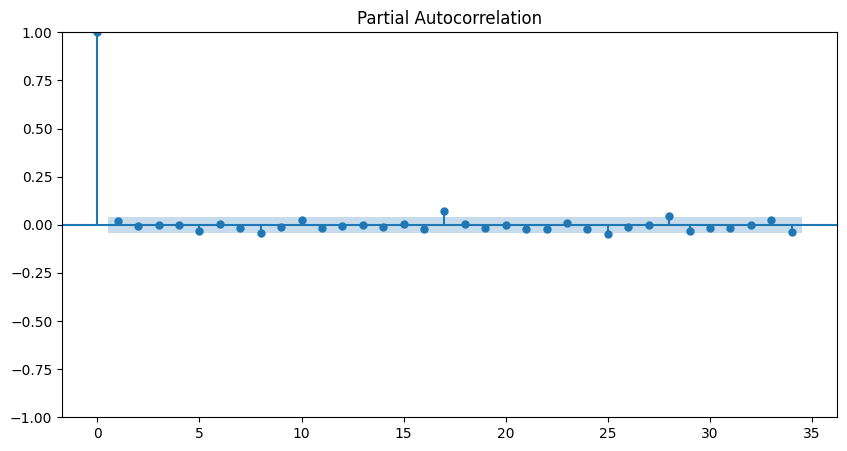

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(goog['LogRet'].dropna(), ax=ax); # p = 0 in AR(p), i.e., google returns are not predictable by past returns

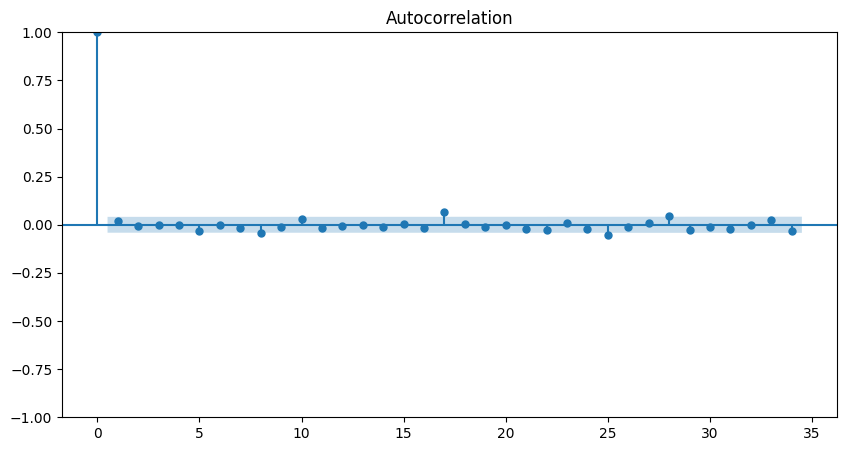

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(goog['LogRet'].dropna(), ax=ax); # q = 0 in MA(q), i.e, google returns are not predictable by past errors

In [29]:
aapl = df[df['Name'] == 'AAPL'][['Close']].copy()

In [30]:
aapl['LogRet'] = log_ret(aapl['Close'])

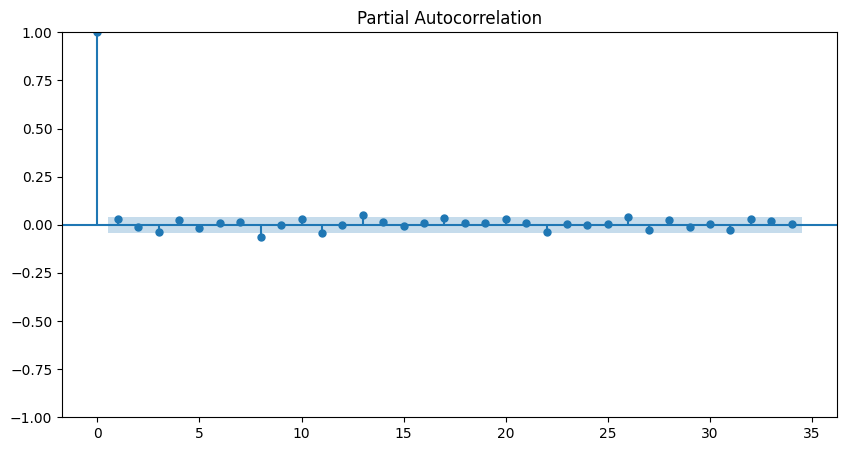

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(aapl['LogRet'].dropna(), ax=ax); # using dropna() because first entry of LogRet is NAN

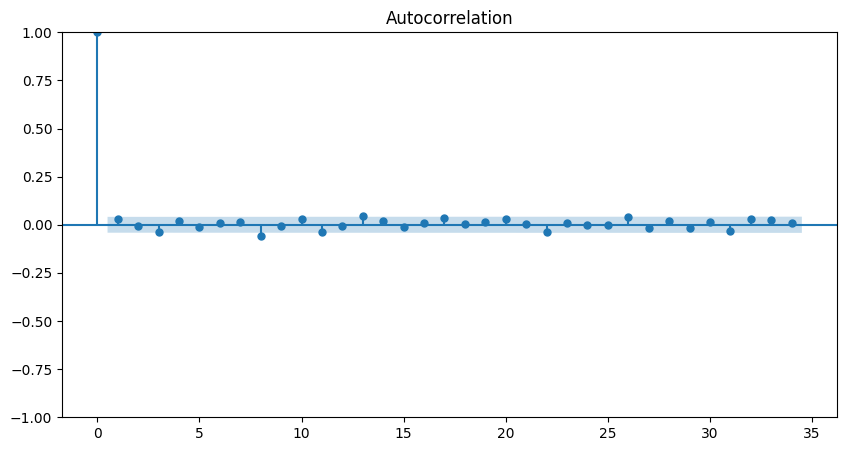

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(aapl['LogRet'].dropna(), ax=ax);

In [33]:
ibm = df[df['Name'] == 'IBM'][['Close']].copy()
ibm['LogRet'] = log_ret(ibm['Close'])

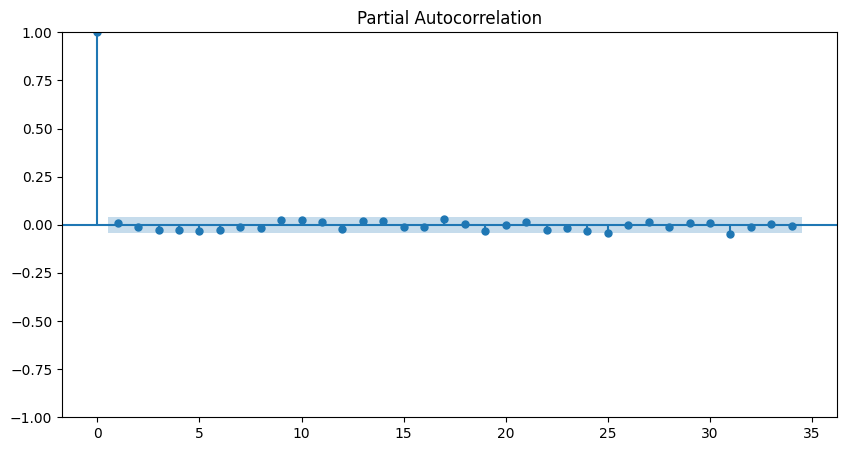

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ibm['LogRet'].dropna(), ax=ax);

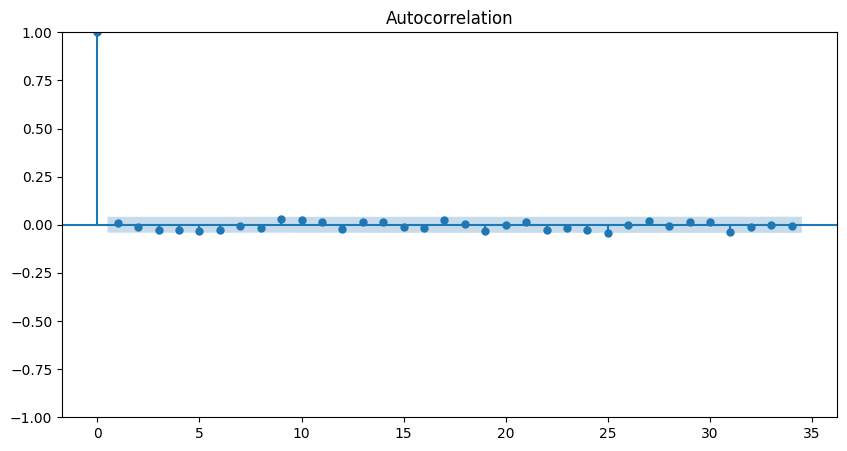

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ibm['LogRet'].dropna(), ax=ax);

In [36]:
sbux = df[df['Name'] == 'SBUX'][['Close']].copy()
sbux['LogRet'] = log_ret(sbux['Close'])

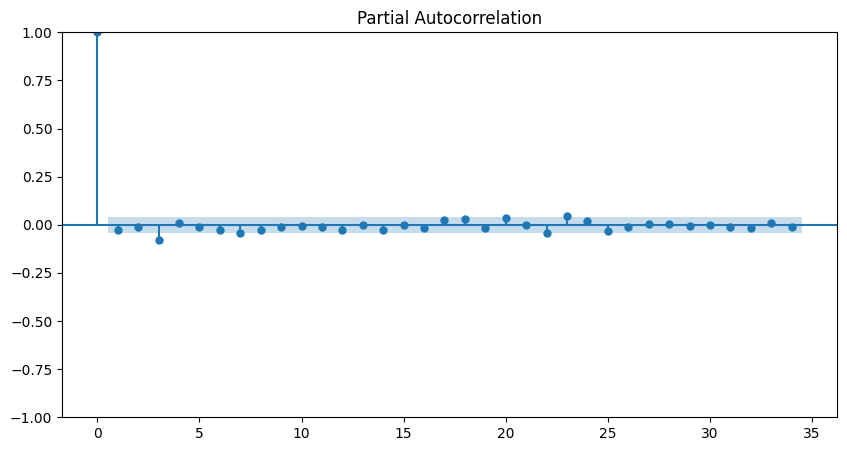

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(sbux['LogRet'].dropna(), ax=ax);

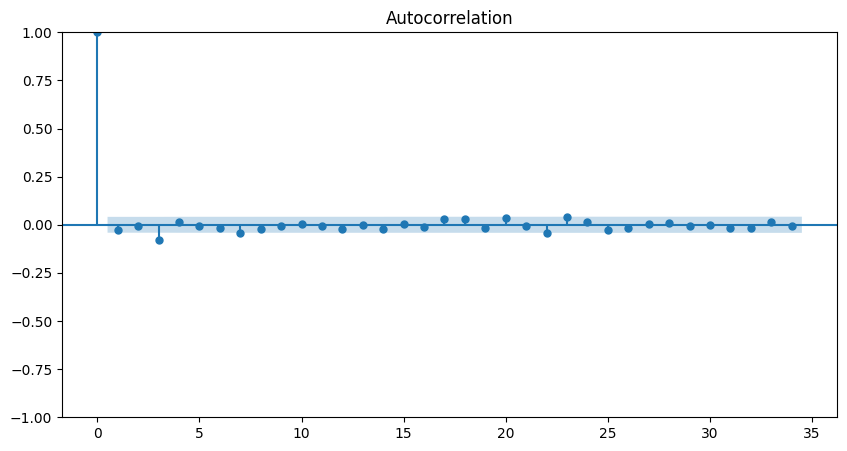

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(sbux['LogRet'].dropna(), ax=ax);